<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков." data-toc-modified-id="Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров: площадь, цена, число комнат, высота потолков.</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры." data-toc-modified-id="Изучение-времени-продажи-квартиры.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры.</a></span></li><li><span><a href="#Удаление-редких-и-выбивающиеся-значения." data-toc-modified-id="Удаление-редких-и-выбивающиеся-значения.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Удаление редких и выбивающиеся значения.</a></span></li><li><span><a href="#Изучение-факторов,-которые-больше-всего-влияют-на-стоимость-квартиры" data-toc-modified-id="Изучение-факторов,-которые-больше-всего-влияют-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучение факторов, которые больше всего влияют на стоимость квартиры</a></span></li><li><span><a href="#Изучение-предложения-квартир.-Выяснение,-какая-область-входит-в-центр-Санкт-Петербурга." data-toc-modified-id="Изучение-предложения-квартир.-Выяснение,-какая-область-входит-в-центр-Санкт-Петербурга.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучение предложения квартир. Выяснение, какая область входит в центр Санкт-Петербурга.</a></span></li><li><span><a href="#Выделение-сегмента-квартир-в-центре.-Анализ-этой-территории-и-изучение-следующих-параметров:-площадь,-цена,-число-комнат,-высота-потолков.-Выделение-факторов,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления)." data-toc-modified-id="Выделение-сегмента-квартир-в-центре.-Анализ-этой-территории-и-изучение-следующих-параметров:-площадь,-цена,-число-комнат,-высота-потолков.-Выделение-факторов,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выделение сегмента квартир в центре. Анализ этой территории и изучение следующих параметров: площадь, цена, число комнат, высота потолков. Выделение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Для работы с данными импортируем библиотеки.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Далее откроем файл `real_estate_data.csv`, сохраним его в переменной `df` и выведем на экран первые 15 строк таблицы

In [2]:
try:
    df = pd.read_csv('/Users/trndn/Desktop/DataScience/projects/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

pd.options.display.max_columns = None   #команада для отображения всех столбцов датафрейма 
df.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Далее выведем на экран общую информацию о таблице с помощью метода `info`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно документации к данным:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении


### Вывод

Получив первоначальную информацию, можно сделать следуюшие выводы.
Датафрейм состоит из 22 столбцов и 23699 строк. 

Вывев первые 15 строк датафрейма, уже заметно, что имеется большое количество пропусков.

Далее разберём по столбцам какие недочёты были замечены:
* `total_images` - пропусков не обнаружено, тип данных корректный
* `last_price` - пропусков не обнаружено, тип данных надо изменить на int
* `total_area` - пропусков не обнаружено, тип данных корректный
* `first_day_exposition` - пропусков не обнаружено, необходимо отформатировать значения даты 
* `rooms` - пропусков не обнаружено, тип данных корректный 
* `ceiling_height` - имеются пропуски, тип данных корректный 
* `floors_total` - имеются пропуски, тип данных надо изменить на int
* `living_area` - имеются пропуски, тип данных корректный 
* `floor` - пропусков не обнаружено, тип данных корректный 
* `is_apartment` - имеются пропуски, тип данных надо изменить на bool
* `studio` - пропусков не обнаружено, тип данных корректный 
* `open_plan` - пропусков не обнаружено, тип данных корректный
* `kitchen_area` - имеются пропуски, тип данных корректный 
* `balcony` - имеются пропуски, тип данных надо изменить на int
* `locality_name` - имеются пропуски, тип данных корректный 
* ` airports_nearest` - имеются пропуски, тип данных надо изменить на int
* `cityCenters_nearest` - имеются пропуски, тип данных надо изменить на int
* `parks_around3000` - имеются пропуски, тип данных надо изменить на int
* `parks_nearest` - имеются пропуски, тип данных надо изменить на int
* `ponds_around3000` - имеются пропуски, тип данных надо изменить на int
* `ponds_neares` - имеются пропуски, тип данных надо изменить на int
* `days_exposition` - имеются пропуски, тип данных необходимо изменить на int

## Предобработка данных

Для начала посчитаем, сколько в каждом столбце пропусков.

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Предлгаю начать заполнять пропуски со столбца `balcony`, потому что наличие пропусков здесь можно объяснить тем, что пользователи могли не указать наличие балкона из-за его отсутствия. Поэтому заменинм пропуски на 0.

In [5]:
df['balcony'] = df['balcony'].fillna(0)

Также сразу заменин тип данных столбца `balcony` на `int`.

In [6]:
df['balcony'] = df['balcony'].astype(int)

По той же аналогии можно заменить и пропуски в столбце `is_apartment`. Если пользователь не указал тип недвижимости, можно предположить, что он мог просто пропустить данный шаг, например, из-за незнания опредления слова "апартаменты" или просто у него квартира, и пользователь не посчитал нужным этого делать. По-моему мнению, люди, продающие апартаменты, знают особенности данног типа недвижимости, и , скорее всего, они бы указали корректный тип недвижимости. Поэтому считаю, что будет заменить пропуски на значение `False`. Но прежде всего изменим тип данных на `bool`. 

In [7]:
df['is_apartment'] = df['is_apartment'].astype(bool)
df['is_apartment'] = df['is_apartment'].fillna(False)

Далее взглянем на пропуски в столбце `locality_name`, попробуя установить взаимосвязь.

In [8]:
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,True,False,False,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,True,False,False,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,True,False,False,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,True,False,False,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,True,False,False,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,True,False,False,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,True,False,False,NaN,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,False,False,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,True,False,False,NaN,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


К сожалению, установить природу и взаимосвязь пропусков в столбце `locality_name` не получилось. Следовательно будет разумно оставить пропуски.

 Попроубем сократить количество пропусков в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`. Будем это делать подстановокй уже известных значений по населенным пунктам. 

In [9]:
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform('median'))
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df.groupby('locality_name')['cityCenters_nearest'].transform('median'))
df['parks_around3000'] = df['parks_around3000'].fillna(df.groupby('locality_name')['parks_around3000'].transform('median'))
df['parks_nearest'] = df['parks_nearest'].fillna(df.groupby('locality_name')['parks_nearest'].transform('median'))
df['ponds_around3000'] = df['ponds_around3000'].fillna(df.groupby('locality_name')['ponds_around3000'].transform('median'))
df['ponds_nearest'] = df['ponds_nearest'].fillna(df.groupby('locality_name')['ponds_nearest'].transform('median'))


Пропуски сократились. К сожалению, дозаполнить остальные нет возможности из-за нехватки данных, оставим тогда так. По первым 50 строкам датафрейма можно заметить, что встречатся такие населенные пункты, по которым во всех шести столбцах пропуски. 

Чуть ниже изменим тип данных для данных столбцов на целочисленный. 

In [10]:
df['airports_nearest'] = np.floor(pd.to_numeric(df['airports_nearest'], errors='coerce')).astype('Int64')
df['cityCenters_nearest'] = np.floor(pd.to_numeric(df['cityCenters_nearest'], errors='coerce')).astype('Int64')
df['parks_around3000'] = np.floor(pd.to_numeric(df['parks_around3000'], errors='coerce')).astype('Int64')
df['parks_nearest'] = np.floor(pd.to_numeric(df['parks_nearest'], errors='coerce')).astype('Int64')
df['ponds_around3000'] = np.floor(pd.to_numeric(df['ponds_around3000'], errors='coerce')).astype('Int64')
df['ponds_nearest'] = np.floor(pd.to_numeric(df['ponds_nearest'], errors='coerce')).astype('Int64')


Далее постараемся заполнить пропуски в столбцах `living_area` и `kitchen_area`. Чтобы заполнить данные пропуски, посчитаем сколько в среденем занимает жилая площадь и площадь кухни от общей площади в процентах.

In [11]:
df['living_area_ratio'] = (df['living_area'] / df['total_area']) 
df['kitchen_area_ratio'] = (df['kitchen_area'] / df['total_area'])
living_area_ratio_mean = df['living_area_ratio'].mean()
kitchen_area_ratio_mean = df['kitchen_area_ratio'].mean()
display(living_area_ratio_mean)
display(kitchen_area_ratio_mean)

0.5647655216993298

0.18735473877173864

Мы получили среднее отношение жилой площади/кухни к общей площади и теперь можем заполнить пропуски:

In [12]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * living_area_ratio_mean)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_area_ratio_mean)

Отформатирует значения даты в столбце `first_day_exposition`, чтобы дата выглядела корректной.

In [13]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

Что касается пропусков в столбце `floors_total`. Установить взаимосвязь с другимии столбцами для заполнения пропусков не удаётся. К тому же, данный столбец не понадобится для дальнейшего исследовательского анализа и количесвто пропусков очень маленькое. Можно просто удалить данные проупски. 

Но для данного столбца стоит изменить тип данных, т. к. этажи описыватся целыми числами.

In [14]:
df = df.dropna(axis='index', how='any', subset=['floors_total'])

In [15]:
df['floors_total'] = df['floors_total'].astype('Int64')

Аналогично и со столбцом `days_exposition`. Природа данных пропусков нам не известна, пропуски остаются.

Также изменим тип данных на целочисленный ниже.

Далее попробуем разобраться со столбцом `ceiling_height`. Для начала посмотрим на его числовое описание.

In [16]:
df['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Мы видим, что максимальное значение в данном столбце достигает аж 100. Ну не бывает потолков высотой в 100 метров.

Предлагаю посомтреть, может это единичное такое аномалие.

In [17]:
df[df['ceiling_height'] <= 100].sort_values(by='ceiling_height', ascending=False).head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.000000,5,Санкт-Петербург,34963,8283,1,223,3,30,19.0,0.560000,0.440000
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,True,False,False,8.000000,0,Волхов,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,0.706667,0.106667
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6,55.5,5,False,False,False,16.500000,4,Санкт-Петербург,18838,3506,0,460,3,511,NaN,0.600649,0.178571
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24,37.7,19,False,False,False,11.000000,2,Санкт-Петербург,42742,9760,0,460,0,503,61.0,0.897619,0.261905
20478,11,8000000.0,45.0,2017-07-18,1,27.0,4,22.0,2,True,False,False,10.000000,1,Санкт-Петербург,18975,3246,0,460,3,449,429.0,0.488889,0.222222
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,True,False,True,4.683868,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,28.0,0.680000,NaN
17857,1,3900000.0,56.0,2017-12-22,3,27.0,5,33.0,4,False,False,False,10.491865,0,Санкт-Петербург,41030,15543,0,460,0,503,73.0,0.589286,NaN
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10,30.1,3,False,False,False,8.100000,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,71.0,0.518966,0.139655
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,True,False,False,12.000000,5,Санкт-Петербург,18732,20444,0,460,3,80,38.0,0.512500,0.150000
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,True,False,False,9.000000,2,деревня Мины,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,540.0,0.555556,0.166667


Отсюда мы видим, что это неединичное аномальное значение. Потолки в 20 метров тоже кажутся неправдоподобными. Оставим пока пропуски, чуть ниже разберемся с выбросами.

Осталось изменить тип данных в столбце `last_price` на целочисленный.

In [18]:
df['last_price'] = df['last_price'].astype(int)

Взглянем на проделанную работу работу с пропусками и по изменению типа данных.

In [19]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9118
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             48
airports_nearest        5386
cityCenters_nearest     5386
parks_around3000        5386
parks_nearest           6019
ponds_around3000        5386
ponds_nearest           5508
days_exposition         3172
living_area_ratio       1870
kitchen_area_ratio      2231
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

Отлично! Количество пропусков сократилось. Типы данных корректны.

## Расчёты и добавление результатов в таблицу

Посчитаем цену одного квадратного метра: разделим стоимость квартиры на общую площадь. 

In [21]:
price_per_squaremeter = df['last_price'] / df['total_area']
df.insert(loc=3, column='price_per_square_meter', value=price_per_squaremeter)
df['price_per_square_meter'] = df['price_per_square_meter'].astype(int)

Посчитаем и добавим в таблицу: день недели, месяц и год публикации объявления

In [22]:
weekday = df['first_day_exposition'].dt.weekday
df.insert(loc=5, column='weekday_exposition', value=weekday)

month = df['first_day_exposition'].dt.month
df.insert(loc=6, column='month_exposition', value=month)

year = df['first_day_exposition'].dt.year
df.insert(loc=7, column='year_exposition', value=year)

In [23]:
df.isna().sum()

total_images                 0
last_price                   0
total_area                   0
price_per_square_meter       0
first_day_exposition         0
weekday_exposition           0
month_exposition             0
year_exposition              0
rooms                        0
ceiling_height            9118
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name               48
airports_nearest          5386
cityCenters_nearest       5386
parks_around3000          5386
parks_nearest             6019
ponds_around3000          5386
ponds_nearest             5508
days_exposition           3172
living_area_ratio         1870
kitchen_area_ratio        2231
dtype: int64

Посчитаем и добавим в таблицу: этаж квартиры; варианты — первый, последний, другой

In [24]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    else:
        return 'последний'
    
df['floor_category'] = df.apply(floor_category, axis = 1)

In [25]:
df['first']=df['floor_category'].apply(lambda x: 1 if x == 'первый' else 0)
df['last']=df['floor_category'].apply(lambda x: 1 if x == 'последний' else 0)
df['else']=df['floor_category'].apply(lambda x: 1 if x == 'другой' else 0)

Расчёт отношения кухни и жилой площади к общей площади был произведён в пункте 2. Результаты расчётов находятся в столбцах `living_area_ratio` и `kitchen_area_ratio`.

## Исследовательский анализ данных

###  Изучение параметров: площадь, цена, число комнат, высота потолков.

Изучим параметры площадь, цена, число комнат, высота потолков, используя метод `describe`.

In [26]:
df.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23613.000000,2.361300e+04,23613.000000,14495.000000
mean,60.340678,6.540555e+06,2.071147,2.771495
std,35.648988,1.090172e+07,1.078380,1.261445
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.800000,6.799000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


 Далее построим гистрограммы для каждого из параметров.

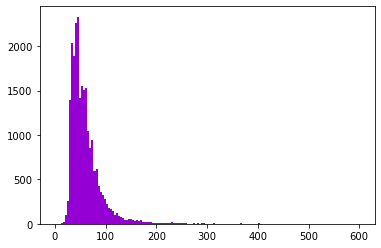

In [27]:
plt.hist(df['total_area'], range=(0, 600), color='darkviolet', bins=150)
plt.show()

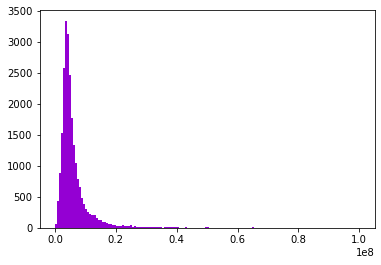

In [28]:
plt.hist(df['last_price'], range=(0, 100000000),color='darkviolet', bins=150)
plt.show()

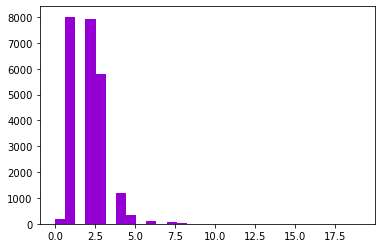

In [29]:
plt.hist(df['rooms'], color='darkviolet', bins=30)
plt.show()

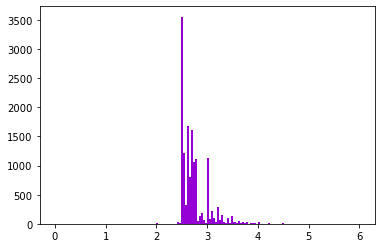

In [30]:
plt.hist(df['ceiling_height'], range=(0, 6), color='darkviolet', bins=150)
plt.show()

**Вывод**

По полученной информации можно сделать вывод:
1. Значения общей площади квартиры находтся в диапозоне от 60 до 900 квадратных метров. Среднее значение равно 36 квадратным метрам, а медиана - 52. Распределение нормальное.
2. Распредление цены недвижимости также нормальное. Среднее значение достигается в отметке 6,5 млн, а медианное - 4,65 млн.
3. Количество комнат находится в диапозоне от 0 до 19 (возможны выбросы). На рынке недвижимости преобладают однокомнатные и двухкомнатные квартиры.
4. В значениях для высоты потолков имеются выбросы. В целом, среднее значение составляет 2.77, а медианное - 2.65.

Подводя итоги, можно отметить, что в данных параметрах имеются выбросы, природу которых на данно этапе выяснить невозможно, для этого следует обратиться к сотрудникам, которые предоставляли данные, для уточнения причины таких выбросов. 

### Изучение времени продажи квартиры.

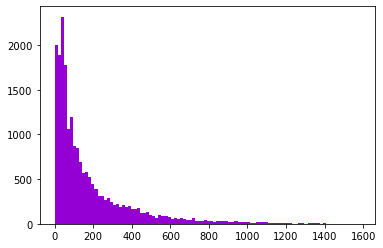

In [31]:
plt.hist(df['days_exposition'],
        color='darkviolet', bins=100)
plt.show()

In [32]:
print('Среднее число дней продажи: ' + str(round(np.mean(df['days_exposition']), 3)))
print('Медианные число дней продажи: ' + str(round(np.nanmedian(df['days_exposition']), 3)))

Среднее число дней продажи: 180.885
Медианные число дней продажи: 95.0


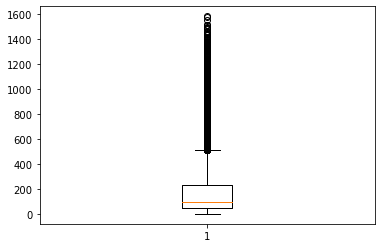

In [33]:
plt.boxplot(df[df['days_exposition'].isna()==False]['days_exposition'])
plt.show()

In [34]:
df['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:**

В среднем квартира продается за 180 дней. 50% квартир были проданы менее: чем за 95 дней. При значении больше 232 можно считать, что продажии шли очень долго, меньше 45 дней - очень быстро.

### Удаление редких и выбивающиеся значения.

In [35]:
cols = ['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']

In [36]:
desc_df = df.loc[:, cols].describe(percentiles=[0.025, 0.975])
desc_df

,last_price,total_area,rooms,ceiling_height,days_exposition
count,2.361300e+04,23613.000000,23613.000000,14495.000000,20441.000000
mean,6.540555e+06,60.340678,2.071147,2.771495,180.884839
std,1.090172e+07,35.648988,1.078380,1.261445,219.685543
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000
2.5%,1.433000e+06,29.100000,1.000000,2.500000,6.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,95.000000
97.5%,2.240000e+07,149.000000,4.000000,3.500000,845.000000
max,7.630000e+08,900.000000,19.000000,100.000000,1580.000000


In [37]:
restr_df = df[((df[cols[0]]>=desc_df[cols[0]]['2.5%'])&(df[cols[0]]<=desc_df[cols[0]]['97.5%'])) &
             ((df[cols[1]]>=desc_df[cols[1]]['2.5%'])&(df[cols[1]]<=desc_df[cols[1]]['97.5%'])) &
             ((df[cols[2]]>=desc_df[cols[2]]['2.5%'])&(df[cols[2]]<=desc_df[cols[2]]['97.5%'])) &
             ((df[cols[3]]>=desc_df[cols[3]]['2.5%'])&(df[cols[3]]<=desc_df[cols[3]]['97.5%']))]

In [38]:
restr_df.describe()

,total_images,last_price,total_area,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,first,last,else
count,12984.000000,1.298400e+04,12984.000000,12984.000000,12984.000000,12984.000000,12984.000000,12984.000000,12984.000000,12984.000000,12984.000000,12984.000000,12984.000000,12984.000000,10501.000000,10501.000000,10501.000000,10196.000000,10501.000000,10435.000000,10879.000000,12319.000000,12301.000000,12984.000000,12984.000000,12984.000000
mean,10.311845,5.653850e+06,57.005969,98078.591651,2.502157,6.321704,2017.522027,2.043515,2.692844,10.452711,32.747077,5.727203,10.089345,0.697705,29113.634511,14657.273022,0.592705,470.069733,0.733549,514.102635,184.841530,0.566402,0.185490,0.124153,0.137631,0.738216
std,5.552092,3.171907e+06,21.189081,31458.236372,1.794279,3.499796,1.019101,0.888466,0.208093,6.220319,14.384686,4.664280,4.692958,1.020716,12908.330532,8635.449501,0.782974,219.489583,0.920066,197.154500,223.912088,0.100925,0.070684,0.329768,0.344525,0.439622
min,0.000000,1.449900e+06,29.100000,17391.000000,0.000000,1.000000,2014.000000,1.000000,2.500000,1.000000,2.000000,1.000000,3.200000,0.000000,0.000000,287.000000,0.000000,3.000000,0.000000,16.000000,1.000000,0.038462,0.055556,0.000000,0.000000,0.000000
25%,6.000000,3.600000e+06,41.400000,78909.750000,1.000000,3.000000,2017.000000,1.000000,2.500000,5.000000,19.703502,2.000000,7.000000,0.000000,18233.000000,10197.000000,0.000000,428.000000,0.000000,478.000000,44.000000,0.500000,0.133333,0.000000,0.000000,0.000000
50%,10.000000,4.800000e+06,52.500000,96250.000000,2.000000,6.000000,2018.000000,2.000000,2.650000,9.000000,30.200000,4.000000,9.000000,0.000000,27381.000000,13282.000000,0.000000,460.000000,0.000000,503.000000,99.000000,0.571429,0.170213,0.000000,0.000000,1.000000
75%,14.000000,6.650000e+06,68.000000,114545.000000,4.000000,10.000000,2018.000000,3.000000,2.770000,14.000000,42.000000,8.000000,11.500000,1.000000,37504.000000,16242.000000,1.000000,460.000000,1.000000,553.000000,237.000000,0.636364,0.227273,0.000000,0.000000,1.000000
max,35.000000,2.240000e+07,149.000000,355555.000000,6.000000,12.000000,2019.000000,4.000000,3.500000,60.000000,128.000000,30.000000,64.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,0.973262,0.715232,1.000000,1.000000,1.000000


**Вывод:**

Убрав редкие и выбивающиеся значения в параметрах, можно заметить, что сдвинулись значения медианны и среднего значения. Такие данные будут отражать более реалистичную картину. 

### Изучение факторов, которые больше всего влияют на стоимость квартиры

Для начала изучим, зависит ли цена от следующих параметров: площадь квартиры, число комнат, этаж, удаленность от центра.

In [39]:
df.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'first', 'last']].corr()

,last_price,total_area,rooms,cityCenters_nearest,first,last
last_price,1.000000,0.653581,0.363124,-0.206461,-0.059710,0.030527
total_area,0.653581,1.000000,0.758324,-0.230886,-0.042313,0.055110
rooms,0.363124,0.758324,1.000000,-0.185872,0.026230,0.063553
cityCenters_nearest,-0.206461,-0.230886,-0.185872,1.000000,0.059950,0.012522
first,-0.059710,-0.042313,0.026230,0.059950,1.000000,-0.152188
last,0.030527,0.055110,0.063553,0.012522,-0.152188,1.000000


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

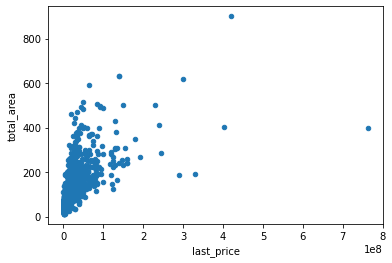

In [40]:
df.plot(kind='scatter', x='last_price', y='total_area')

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

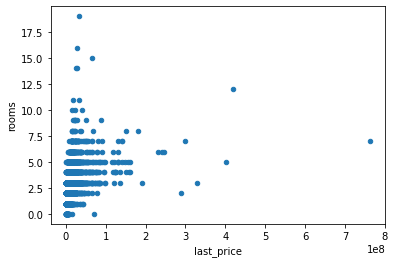

In [41]:
df.plot(kind='scatter', x='last_price', y='rooms')

<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

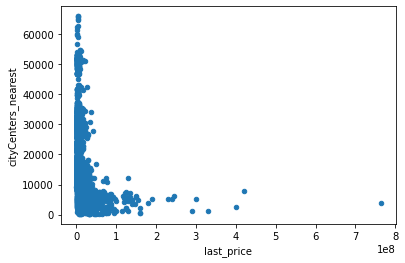

In [42]:
df.plot(kind='scatter', x='last_price', y='cityCenters_nearest')

Далее изучим зависимость от даты размещения: дня недели, месяца и года. 

In [43]:
df.loc[:, ['last_price', 'weekday_exposition', 'month_exposition', 'year_exposition']].corr()

,last_price,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,0.001295,0.002765,-0.043023
weekday_exposition,0.001295,1.000000,0.012166,-0.003927
month_exposition,0.002765,0.012166,1.000000,-0.270031
year_exposition,-0.043023,-0.003927,-0.270031,1.000000


<AxesSubplot:xlabel='last_price', ylabel='weekday_exposition'>

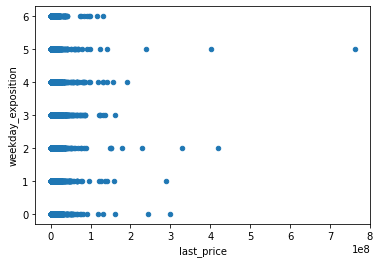

In [44]:
df.plot(kind='scatter', x='last_price', y='weekday_exposition')

<AxesSubplot:xlabel='last_price', ylabel='month_exposition'>

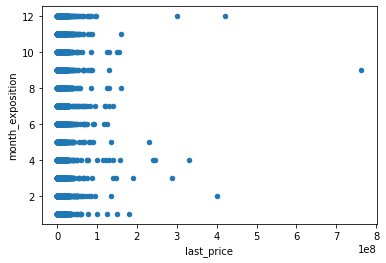

In [45]:
df.plot(kind='scatter', x='last_price', y='month_exposition')

<AxesSubplot:xlabel='last_price', ylabel='year_exposition'>

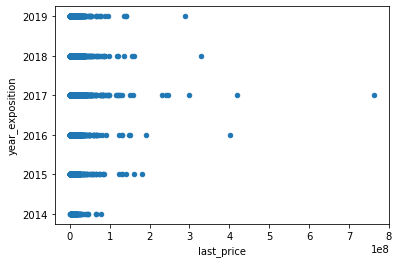

In [46]:
df.plot(kind='scatter', x='last_price', y='year_exposition')

Затем посчитаем среднюю цену за квадратный метр в десяти населенных пунктах с бОльшим числом объявлений. 

In [47]:
df.groupby('locality_name').agg({'last_price': 'count',
                                'price_per_square_meter': 'mean'}).reset_index().sort_values(by='last_price', ascending=False).head(10).sort_values(by='price_per_square_meter', ascending=False)

,locality_name,last_price,price_per_square_meter
33,Санкт-Петербург,15651,114868.433902
32,Пушкин,369,103125.373984
93,деревня Кудрово,299,92473.086957
296,посёлок Парголово,327,90175.489297
291,посёлок Мурино,520,85672.803846
326,посёлок Шушары,439,78550.883827
13,Колпино,338,75424.150888
6,Гатчина,307,68745.693811
3,Всеволожск,398,68654.007538
4,Выборг,237,58141.489451


**Вывод**

Из проведенных выше исследований можно сделать следующие выводы:
1. На цену квартиры влияет общая площадь помещения и количество комнат. Общая площадь имеет бОльшее значение при выставлении цены. Также продавцы хотят больше денег за квартиры, которые находятся на последнем этаже. А вот близость к центру и первый этаж не особо влияют на выставление цены. 

2. Изучив зависимость цены от даты размещения, можно отметить, что продавцы, выставлявшие свои квартиры во второй половине недели, хотят больше за неё денег. Также здесь прослеживается, что цены на квартиры выше в нелетний сезон выше. Видимо это от того, что летом все думают об отдыхе, а не о продаже/покупке квартиры. Год не влияет на цену продажи.

3. Выбрав 10 населенных пунктов с наибольшим числом публикаций, мы посчитали среднюю цену за квадратный метр, и оказалось, что в Санкт-Петербурге самая высокая цена за 1 кв. м, а вот в Выборге, наоборот, самая низкая. 

### Изучение предложения квартир. Выяснение, какая область входит в центр Санкт-Петербурга. 

In [48]:
spb_data = df[df['locality_name']=='Санкт-Петербург']
spb_data['round_center']=spb_data['cityCenters_nearest'].apply(lambda x: round(x/1000) if x >=0 else np.nan)
spb_center_price = spb_data.groupby('round_center').mean()['last_price'].reset_index()
spb_center_price

,round_center,last_price
0,0,3.144912e+07
1,1,2.120672e+07
2,2,1.778832e+07
3,3,1.113739e+07
4,4,1.330428e+07
5,5,1.445600e+07
6,6,1.533842e+07
7,7,1.477515e+07
8,8,9.949111e+06
9,9,6.956583e+06


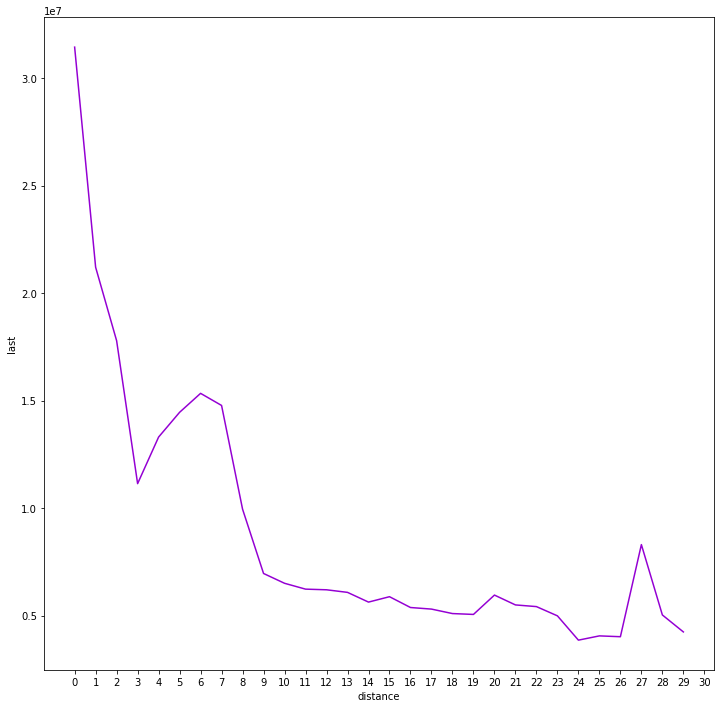

In [49]:
plt.figure(figsize=(12, 12))
plt.plot(spb_center_price['round_center'],spb_center_price['last_price'], 
           color='darkviolet')
plt.xlabel('distance')
plt.xticks(np.arange(0, len(spb_center_price['round_center'])+1, 1))
plt.ylabel('last')
plt.show()

**Вывод:**

По графику видно, что снижение цены происходит на отметке в 6 км. Отсюда будем считать, что центр Санкт-Петербурга находится в радиусе 6 км. 

### Выделение сегмента квартир в центре. Анализ этой территории и изучение следующих параметров: площадь, цена, число комнат, высота потолков. Выделение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [50]:
center_df = spb_data[spb_data['round_center']<=6]
center_df.loc[:, ['last_price', 'total_area', 'rooms', 'ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,3.098000e+03,3098.000000,3098.000000,2019.000000
mean,1.490340e+07,94.578037,2.888315,3.147192
std,2.512454e+07,60.271127,1.489752,0.915351
min,1.600000e+06,12.000000,0.000000,2.400000
25%,6.800000e+06,58.700000,2.000000,2.880000
50%,9.359950e+06,80.000000,3.000000,3.050000
75%,1.437500e+07,110.600000,4.000000,3.300000
max,7.630000e+08,631.200000,19.000000,32.000000


In [51]:
spb_data.loc[:, ['last_price', 'total_area', 'rooms', 'ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,1.565100e+04,15651.000000,15651.000000,10096.000000
mean,8.064895e+06,64.746341,2.172385,2.803717
std,1.303626e+07,40.426740,1.148437,1.297423
min,1.219000e+04,12.000000,0.000000,1.000000
25%,4.200000e+06,42.000000,1.000000,2.550000
50%,5.500000e+06,55.000000,2.000000,2.700000
75%,8.150000e+06,74.550000,3.000000,2.870000
max,7.630000e+08,900.000000,19.000000,100.000000


In [52]:
center_df.loc[:, ['last_price', 'rooms', 'first', 'last', 'else', 'cityCenters_nearest', 'weekday_exposition', 'month_exposition',
       'year_exposition']].corr()

,last_price,rooms,first,last,else,cityCenters_nearest,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,0.303899,-0.079085,0.071329,-0.005368,-0.050683,0.026574,-0.010521,-0.031870
rooms,0.303899,1.000000,-0.082235,0.081444,-0.011738,-0.141932,-0.010340,-0.032876,-0.050149
first,-0.079085,-0.082235,1.000000,-0.169731,-0.551761,-0.056624,-0.009436,0.011375,0.032142
last,0.071329,0.081444,-0.169731,1.000000,-0.728250,-0.089052,0.021831,-0.012638,0.004661
else,-0.005368,-0.011738,-0.551761,-0.728250,1.000000,0.114739,-0.011913,0.002785,-0.026296
cityCenters_nearest,-0.050683,-0.141932,-0.056624,-0.089052,0.114739,1.000000,-0.011468,-0.004369,0.032187
weekday_exposition,0.026574,-0.010340,-0.009436,0.021831,-0.011913,-0.011468,1.000000,0.024678,0.002815
month_exposition,-0.010521,-0.032876,0.011375,-0.012638,0.002785,-0.004369,0.024678,1.000000,-0.241728
year_exposition,-0.031870,-0.050149,0.032142,0.004661,-0.026296,0.032187,0.002815,-0.241728,1.000000


In [53]:
spb_data.loc[:, ['last_price', 'rooms', 'first', 'last', 'else', 'cityCenters_nearest', 'weekday_exposition', 'month_exposition',
       'year_exposition']].corr()

,last_price,rooms,first,last,else,cityCenters_nearest,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,0.372108,-0.048811,0.065248,-0.015684,-0.257536,0.006046,-0.000022,-0.044603
rooms,0.372108,1.000000,0.028172,0.082096,-0.084845,-0.293029,-0.008843,-0.007859,-0.061406
first,-0.048811,0.028172,1.000000,-0.125466,-0.628416,-0.013269,-0.007694,-0.007357,-0.008715
last,0.065248,0.082096,-0.125466,1.000000,-0.692886,-0.087421,0.006403,-0.003993,-0.009743
else,-0.015684,-0.084845,-0.628416,-0.692886,1.000000,0.078188,0.000572,0.008478,0.013973
cityCenters_nearest,-0.257536,-0.293029,-0.013269,-0.087421,0.078188,1.000000,0.000382,0.007305,0.085437
weekday_exposition,0.006046,-0.008843,-0.007694,0.006403,0.000572,0.000382,1.000000,0.003689,-0.001939
month_exposition,-0.000022,-0.007859,-0.007357,-0.003993,0.008478,0.007305,0.003689,1.000000,-0.278403
year_exposition,-0.044603,-0.061406,-0.008715,-0.009743,0.013973,0.085437,-0.001939,-0.278403,1.000000


**Вывод:**

1. Изучая параметры по центру Санкт-Петербурга и по всему городу, можно заметить, что все изученные параметры(цена, площадь, количество комнат и высота потолков) имеют большие значения, чем по всему городу. 

2. Что касается зависимостей, то стоит отметить, что на цену в центре влияют следующие показатели: количество комнат, последний ли этаж, день недели размещения. Если смотреть на зависимости по всему городу, то в этот список стоит добавить еще и месяц размещения, но влияние очень маленькое. Что для центра и что для города в целом, большее значение имеет количество комнат. Также стоит отметить, что при размещении в центре города, последний этаж играет большую роль, чем по городу в целом при опредлении уены продажи. 

**Визуализация данных по параметру 'цена'**

<AxesSubplot:ylabel='Frequency'>

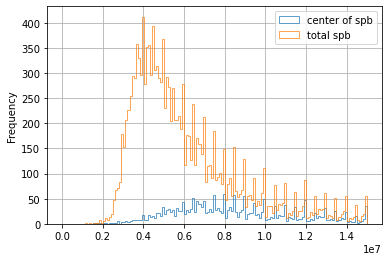

In [54]:
center_hist_last_price = center_df.plot(
    kind='hist', 
    y='last_price', 
    histtype='step', 
    bins = 150,
    range = (20000, 15000000),
    linewidth=1,
    alpha=0.7,
    label='center of spb'
)

spb_data.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    bins=150,
    range = (20000, 15000000),
    linewidth=1,
    alpha=0.7,
    label='total spb',
    ax=center_hist_last_price ,
    grid=True,
    legend=True
)

**Визуализация данных по параметру 'площадь'**

<AxesSubplot:ylabel='Frequency'>

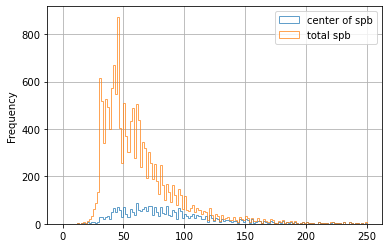

In [55]:
center_hist_total_area = center_df.plot(
    kind='hist', 
    y='total_area', 
    histtype='step', 
    bins = 150,
    range=(0, 250),
    linewidth=1,
    alpha=0.7,
    label='center of spb'
)

spb_data.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    bins=150,
    range=(0, 250),
    linewidth=1,
    alpha=0.7,
    label='total spb',
    ax=center_hist_total_area,
    grid=True,
    legend=True
)

**Визуализация данных по параметру 'количество комнат'**

<AxesSubplot:ylabel='Frequency'>

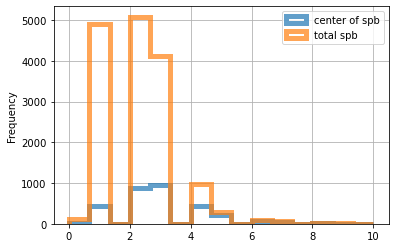

In [56]:
center_hist_rooms = center_df.plot(
    kind='hist', 
    y='rooms', 
    histtype='step', 
    bins = 15,
    range=(0, 10),
    linewidth=5,
    alpha=0.7,
    label='center of spb'
)

spb_data.plot(
    kind='hist',
    y='rooms',
    histtype='step',
    bins=15,
    range=(0, 10),
    linewidth=5,
    alpha=0.7,
    label='total spb',
    ax=center_hist_rooms,
    grid=True,
    legend=True
)

**Визуализация данных по параметру 'высота потолков'**

<AxesSubplot:ylabel='Frequency'>

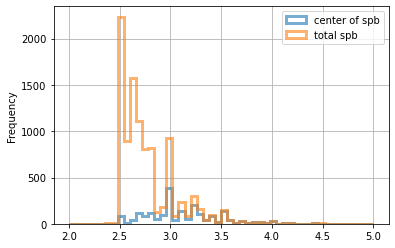

In [57]:
center_hist_ceiling_height = center_df.plot(
    kind='hist', 
    y='ceiling_height', 
    histtype='step', 
    bins = 50,
    range=(2, 5),
    linewidth=3,
    alpha=0.6,
    label='center of spb'
)

spb_data.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    bins=50,
    range=(2, 5),
    linewidth=3,
    alpha=0.6,
    label='total spb',
    ax=center_hist_ceiling_height,
    grid=True,
    legend=True
)

**Вывод:**

1. Изучая параметры по центру Санкт-Петербурга и по всему городу, можно заметить, что все изученные параметры(цена, площадь, количество комнат и высота потолков) имеют большие значения, чем по всему городу. 

2. Что касается зависимостей, то стоит отметить, что на цену в центре влияют следующие показатели: количество комнат, последний ли этаж, день недели размещения. Если смотреть на зависимости по всему городу, то в этот список стоит добавить еще и месяц размещения, но влияние очень маленькое. Что для центра и что для города в целом, большее значение имеет количество комнат. Также стоит отметить, что при размещении в центре города, последний этаж играет большую роль, чем по городу в целом при опредлении уены продажи. 

## Общий вывод

Был проведён исследовательский анализ архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Перед провдением самого анализа была произведена предобработка данных: устранены пропуски, где это было возможно, изменён тип данных для удобства дальнейшей работы с даннными. К сожалению, не все пропуски удалось заполнить: из-за аномалий в значений или просто не удалось установить взаимосвязь для устранения пропусков в другими параметрами. Если бы мы хотели заполнить все пропуски, нам бы стоило обратиться к сотрудникам, которые предоставили данный датасет для выявления таких проблем. Затем были произвдены расчёты для дальнейшего исследования: цена за 1 квадратный метр, дата публикации, категоризация этажа квартиры, соотношние жилой площади/кухни и общей площади. 

Проведя исследовательский анализ, мы получили следующие результаты. В среднем площадь недвижимости составляет 36 кв. м, цена - 6.5 млн, а на рынке преобладают одно- и двухкомнатные квартиры. В среднем квартира продается за 180 дней. 50% квартир были проданы менее: чем за 95 дней. При значении больше 232 можно считать, что продажии шли очень долго, меньше 45 дней - очень быстро. В данных имелось достаточное количество выбросов, которые были устранены, значения медианны и средней после данной манипуляции сместились. Средняя цена уменьшилась до 5,64 млн, а средняя площадь, наоборот, увеличилась до 56 кв. м. Далее изучили, какие параметры влияют на цену квартиры. На цену квартиры влияет общая площадь помещения и количество комнат. Изучая населенные пункты, мы отметили, что в Санкт-Петербуге самая высокая цена за один квадратный метр, а в Выборге самая низкая. Следующим этапом выяснили, что в центр Санкт-Петербурга входит область радиусом 6 км. И вот после этого проанализировали параметры по центру города и города в целом. И получили, что все изученные параметры(цена, площадь, количество комнат и высота потолков) имеют большие значения, чем по всему городу.